In [34]:
import tweepy
import csv
import configparser

In [35]:
consumer_key = 'key'
consumer_secret = 'secret'
access_token = 'token'
access_token_secret = 'token_secret'

In [36]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [37]:
# pause and wait if you've hit Twitter's rate limit
# from http://docs.tweepy.org/en/v3.9.0/code_snippet.html
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            time.sleep(15 * 60)
        except StopIteration:
            return
        
# create an outputfile name based on the query you ran
def get_output_file_name(query_string):
    file_name = query_string + '.csv'
    if query_string[0:1] == '#':
        file_name = query_string[1:len(query_string)] + '_hashtag.csv'
        file_name = file_name.replace("#","")
        file_name = file_name.replace(" ","_")
    return file_name

In [38]:
# specify your search term and the maximum number of tweets to return
query = "#creditcardfraud"
max_items = 5000


# create an output filename based on the query
file_name = get_output_file_name(query)

# Open/Create a file to append data
print("appending to csv file "+file_name)
csvFile = open(file_name, 'a')
csvWriter = csv.writer(csvFile)

# get the tweets that match your query and write them to a csv file
for tweet in limit_handled(tweepy.Cursor(api.search,q=query,count=100,
                           lang="en",
                           since="2019-01-01").items(max_items)):
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
csvFile.close()

# inform us when you have finished
print('Done.')


appending to csv file creditcardfraud_hashtag.csv
2020-09-24 21:01:04 RT @FICO: Read this excellent article on the future of #cybersecurity by @Forbes Technology Council member Dr. Vinod Vasudevan, CTO at @Pal…
2020-09-24 21:00:58 Read this excellent article on the future of #cybersecurity by @Forbes Technology Council member Dr. Vinod Vasudeva… https://t.co/BePiypYetr
2020-09-24 15:59:02 There is a credit card scam happening at @BowieState University and they aren’t checking for the correct identification. #creditcardfraud
2020-09-24 09:25:29 @sylvanjohnson @PS568887932 Lol if i were you i would not send my money to these people 😂🙈 #fraud #creditcardfraud #scam
2020-09-23 17:31:15 How Blaze Pizza Fires Up Friendly Fraud Defenses. https://t.co/msmS3yUEsv #chargebacks #friendlyfraud #creditcardfraud
2020-09-23 14:15:47 The best way to prevent and detect credit card fraud in a post-COVID world is to implement these strategies which m… https://t.co/hDsmnsUWcA
2020-09-23 05:59:23 RT @Julie

In [39]:
# remove retweets and have all data in a csv file with column names: created_date, hashtags, number of hashtags, tweet_length, and tweet_text

# The hashtags parameter of this function should be an array of hashmaps from Twitter's Tweet object, 
# where the each hashtag is represented as a dictionary containing the text of the hashtag, the offsets, etc.
# "entities":
#{
#    "hashtags":[{'text': 'MAGA', 'indices': [100, 105]}],
#    "urls":[],
#    "user_mentions":[],
#    "media":[],
#    "symbols":[]
#    "polls":[]
#}
hashtag_counts = {}

def get_hashtag_text(hashtags):
    if hashtags == None:
        return '',0
    hashtag_string = ''
    num_hashtags = 0
    for cur_hash in hashtags or []: 
        cur_hashtag = cur_hash['text']
        if num_hashtags > 0:
            hashtag_string += ' '
        num_hashtags += 1
        hashtag_string += cur_hashtag
        if cur_hashtag in hashtag_counts:
            hashtag_counts[cur_hashtag] += 1
        else:
            hashtag_counts[cur_hashtag] = 1
    return hashtag_string, num_hashtags



# specify your search term and the maximum number of tweets to return
# determine whether to filter retweets, and whether to overwrite any files with the same name
# generated from previous queries

query = "#creditcardfraud"


max_items = 5000
filter_retweets = True
overwrite_output_file = True

# create a filename based on the query
file_name = get_output_file_name(query)

# add Twitter query flags if necessarytotal
if filter_retweets:
    query = query + " -filter:retweets"

write_mode = 'a'
if overwrite_output_file:
    write_mode = 'w'

# open/create a file to hold result data
print('writing output to csv file  '+file_name+'\n')
csvFile = open(file_name, write_mode)
csvWriter = csv.writer(csvFile)

# set up some variables to hold counts
hashtag_counts = {}
total_hashtags = 0
num_tweets = 0
total_tweet_length = 0

# write a header row for your data file
csvWriter.writerow(["created_date","hashtags", "num_hashtags", "tweet_length", "tweet_text"])

# get the tweets that match your query and write them to a csv file
for tweet in limit_handled(tweepy.Cursor(api.search,q=query,count=100,
                           lang="en",
                           since="2019-01-01").items(max_items)):
    num_tweets += 1
    tweet_length = len(tweet.text)
    total_tweet_length +=tweet_length
    #print(tweet.entities['hashtags'])
    hashtag_string, num_hashtags = get_hashtag_text(tweet.entities['hashtags']) 
    total_hashtags += num_hashtags
    #print("SYMBOLS:  ",tweet.entities['user_mentions'])            
    if num_tweets <= 10: 
        print ('HASHTAGS: ', hashtag_string, "\tTEXT:", tweet.text)
    csvWriter.writerow([tweet.created_at,hashtag_string, num_hashtags, tweet_length, tweet.text])
csvFile.close()

# inform us of your results when you have finished
print('\nResults:')
print('Tweets: ', num_tweets)
print('Average tweet length in characters: ', total_tweet_length / num_tweets)
print('Total hashtags: ', total_hashtags)
print('Unique hashtags: ',len(hashtag_counts))
print('Hashtags: ',hashtag_counts.keys())


writing output to csv file  creditcardfraud_hashtag.csv

HASHTAGS:  cybersecurity 	TEXT: Read this excellent article on the future of #cybersecurity by @Forbes Technology Council member Dr. Vinod Vasudeva… https://t.co/BePiypYetr
HASHTAGS:  creditcardfraud 	TEXT: There is a credit card scam happening at @BowieState University and they aren’t checking for the correct identification. #creditcardfraud
HASHTAGS:  fraud creditcardfraud scam 	TEXT: @sylvanjohnson @PS568887932 Lol if i were you i would not send my money to these people 😂🙈 #fraud #creditcardfraud #scam
HASHTAGS:  chargebacks friendlyfraud creditcardfraud 	TEXT: How Blaze Pizza Fires Up Friendly Fraud Defenses. https://t.co/msmS3yUEsv #chargebacks #friendlyfraud #creditcardfraud
HASHTAGS:   	TEXT: The best way to prevent and detect credit card fraud in a post-COVID world is to implement these strategies which m… https://t.co/hDsmnsUWcA
HASHTAGS:   	TEXT: What the hell is this!!! I didn't even know about the substitutions, part 

In [40]:
import pandas as pd
df = pd.read_csv('./creditcardfraud_hashtag.csv')
list(df.columns)
#get all of the values from the tweet_text column as an array, then use Python's join() function to
#put all of the tweets together into one big string
all_tweet_text_as_one_big_string = ' '.join(df['tweet_text'].tolist())

In [41]:
import unicodedata
import string
import nltk
import re
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet as wn
from nltk.probability import FreqDist

lemmatizer = WordNetLemmatizer() 
# convert nltk pos-tag to wordnet pos-tag
# for use by the wordnet lemmatizer
def get_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('N'):
        return wn.NOUN
    elif nltk_tag.startswith('V'):
        return wn.VERB
    elif nltk_tag.startswith('J'):
        return wn.ADJ
    elif nltk_tag.startswith('R'):
        return wn.ADV
    else:          
        return None

# load the English stopword list from NLTK
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

# define a small function to normalize the text by:
# 1. getting rid of spaces on the edge
# 2. converting all capital letters to lowercase

def normalize(text):
    return  unicodedata.normalize('NFD',text.strip().lower())


In [42]:
# this version of tokenize allows you control the tokenization results with three paramenters:
#
# remove_punct:  default False, whether to exclude punctuation from the token list
# remove_stop:  default False, whether to exclude punctuation from the token list
# stem_tokens: default False, whether to stem the tokens of the token list
# lemmatize_tokens: default False, whether to lemmatize the tokens of the token list
# all_fields: default False, whether to return a list in which each token is represented 
#     as a dictionary containing everything we have calculated for each token


def tokenize(text, remove_punct=False,  remove_stop=False, stem_tokens=False, lemmatize_tokens=False, all_fields=False):
    tokens = []
    text = normalize(text)
 
    for token in nltk.pos_tag(nltk.word_tokenize(text)):
        stem = ''
        token_text = token[0]
        token_pos = token[1]
        if remove_punct and token_text in string.punctuation: 
            continue
        if remove_stop and token_text.strip().lower() in stopwords:
            continue
        if stem_tokens or all_fields:
            stem = stemmer.stem(token_text)
        if lemmatize_tokens or all_fields:
            wordnet_tag = get_wordnet_tag(token_pos)
            if wordnet_tag is not None:
                lemma = lemmatizer.lemmatize(token_text,wordnet_tag)
            else:
                lemma = token_text
        if all_fields:
            tokens.append({'token': token_text, 'stem': stem, 'lemma': lemma})
        elif stem_tokens:
            tokens.append(stem)
        else:
            tokens.append(token_text)     
    return tokens

In [43]:
#apply the new tokenize function to all tweets, and print the before and after results
tokens = tokenize(all_tweet_text_as_one_big_string, remove_punct=True, remove_stop=True, lemmatize_tokens=True)
print(tokens)

['read', 'excellent', 'article', 'future', 'cybersecurity', 'forbes', 'technology', 'council', 'member', 'dr.', 'vinod', 'vasudeva…', 'https', '//t.co/bepiypyetr', 'credit', 'card', 'scam', 'happening', 'bowiestate', 'university', '’', 'checking', 'correct', 'identification', 'creditcardfraud', 'sylvanjohnson', 'ps568887932', 'lol', 'would', 'send', 'money', 'people', '😂🙈', 'fraud', 'creditcardfraud', 'scam', 'blaze', 'pizza', 'fires', 'friendly', 'fraud', 'defenses', 'https', '//t.co/msms3yuesv', 'chargebacks', 'friendlyfraud', 'creditcardfraud', 'best', 'way', 'prevent', 'detect', 'credit', 'card', 'fraud', 'post-covid', 'world', 'implement', 'strategies', 'm…', 'https', '//t.co/hdsmnsuwca', 'hell', "n't", 'even', 'know', 'substitutions', 'part', 'order', "n't", 'maybe', 'rolled…', 'https', '//t.co/tnoi67mhm9', 'read', 'excellent', 'article', 'future', 'cybersecurity', 'forbes', 'technology', 'council', 'member', 'dr.', 'vinod', 'vasudeva…', 'https', '//t.co/7z2ycuum9o', 'british', '

In [44]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

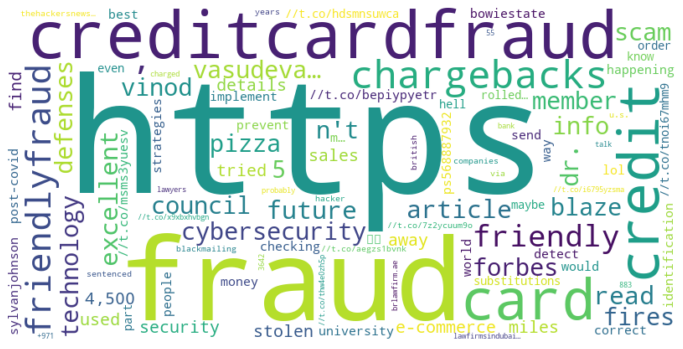

In [45]:
from wordcloud import WordCloud
#Frequency of words
fdist = FreqDist(tokens)
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

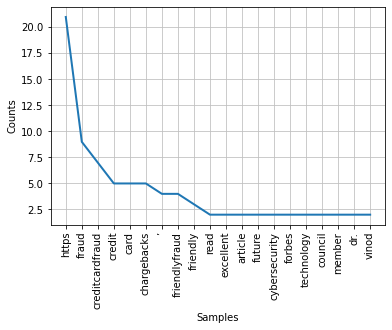

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
fdist.plot(20,cumulative=False)